In [10]:
from recommender.User import User
from recommender.Articles import ArticlesModel, ArticlesVec, ArticlesGeo
from recommender.Clustering import Clustering
from recommender.DataLoader import DataLoader
import numpy as np
from gensim.models import KeyedVectors
import gensim.downloader as api
import folium

In [15]:
model = KeyedVectors.load_word2vec_format(api.load('word2vec-google-news-300', return_path=True), binary=True, limit=100000)

In [16]:
topics = np.load('data/topics.npy')

## DataLoader

In [17]:
dataloader = DataLoader(model=model)
data = dataloader.load_preprocess()

## Articles

In [5]:
articles = ArticlesModel(data, topics, model)

#### Save articles vectorization based on the topics

In [6]:
articles.save_vec_by_topics()

#### Get the summary of the best articles by arbitrary topic(s)

In [7]:
ids = articles.ids_top_articles_by_topic(['Bern', 'Mountain'])
for idx in ids:
    print(articles.get_summary(idx) + '\n')

The Rosenlaui Glacier, located to the south of Meiringen, in the canton of Bern, might be small, since it has an area of only six square kilometers, but thanks to this glacier two beautiful natural attractions have come into being - Glacier Gorge Rosenlaui and the world-famous Reichenbach Falls.

Les Diablerets, an important centre for adventure sports, lies between Lake Geneva and Gstaad at an altitude of 1200 metres. Even in summer, the Glacier 3000 ski region in the heart of the Vaud Alps offers skiing and glacier enjoyment over an expansive area.

The vacation region around the Black Lake and in the Eastern Freiburg Pre-Alps (Voralpen) is well-known for its authenticity and its wild, romantic natural landscape, which includes the dark appearance of the Black Lake and the Brecca Abyss, an Alpine valley formed by glaciers.

The Bern bear pit is an attraction that is known far beyond the borders of Switzerland. Since 2009 the bears of Bern also have a modern 6,000 square meters park a

#### Get information about a specific article with known idx

In [8]:
idx = 0

summary = articles.get_summary(idx)
content = articles.get_content(idx)
preprocessed = articles.get_preprocessed(idx)
vector = articles.get_vec(idx)

print(summary, content, preprocessed, vector, sep='\n\n')

Situated in the heart of Gruyère, the city of Bulle is the administrative capital of this largely agricultural region and has a wealth of attractions to appeal to all tastes.

In this preserved and unspoilt environment, the visitor can enjoy the most varied and seasonal activities in a pastoral setting.Firmly anchored in ancestral and typical traditions, its museum charts the marked development of the town and its surrounding region. Renowned as a cultural meeting place, the city boasts folk markets, livestock fairs, salons, exhibitions, theatres, concerts and shows which attract a very diverse public audience.The culinary arts remain the focal point for many visitors to Gruyère, and each year the local restaurants offer Bénichon feast menus alongside regional specialities.

['Situated', 'heart', 'city', 'administrative', 'capital', 'largely', 'agricultural', 'region', 'wealth', 'attractions', 'appeal', 'tastes']

[0.002184858836335123, 0.0018071947571787455, 0.7952866481551175, 0.0224

#### Plot topic weights for a given article

Situated in the heart of Gruyère, the city of Bulle is the administrative capital of this largely agricultural region and has a wealth of attractions to appeal to all tastes.


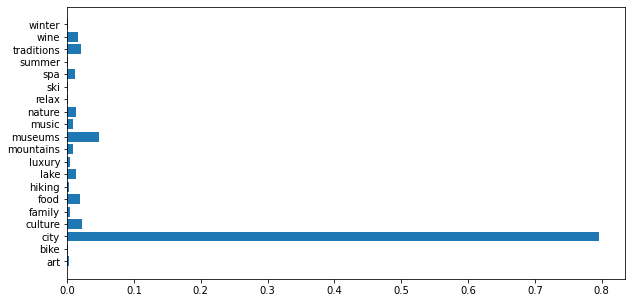

In [10]:
idx = 0
articles.plot_weights(idx)

#### Use a precomputed topics based vector representation for the articles to speed up the object initialization

In [8]:
vec_by_topics = np.load('data/vec_articles.npy')
articles = ArticlesVec(data, topics, vec_by_topics)

## User

In [5]:
topics

array(['art', 'bike', 'city', 'culture', 'family', 'food', 'hiking',
       'lake', 'luxury', 'mountains', 'museums', 'music', 'nature',
       'relax', 'ski', 'spa', 'summer', 'traditions', 'wine', 'winter'],
      dtype='<U10')

In [6]:
choices = ['ski', 'spa']

user = User(topics, choices)

#### Recommend articles for the user

In [20]:
n_recommendations = 5

recommended_articles_ids, recommended_articles_vec = articles.recommend_articles(user, n_recommendations)
for i, idx in enumerate(recommended_articles_ids):
    print(i, articles.get_summary(idx), sep=': ', end='\n\n')

0: The striking viewing platform above Brunnen can be easily reached by chair lift from car-free Stoos. Gaze across the arms of Lake Lucerne to the Black Forest.

1: This panoramic train connects the north of Europe to its south – right through the UNESCO World Heritage site of Rhaetian Railway, passing by glaciers on its way down to palm trees.

2: At the very heart of Switzerland, a world record holding technical innovation awaits: the world’s steepest funicular leads from Schwyz up to Stoos.

3: The snow park is open to skiers and snowboarders of all ages!

4: The visitor trail provides a complete immersion into the brand, history and products of Cailler of Switzerland. The experience is sensitive, sensual and poetic, giving the visitor a window into the world of chocolate by means of a transparent and sparkling aesthetic.



In [23]:
seen_articles = [0,3]

user.update(np.array(recommended_articles_vec)[seen_articles])
user.add_seen_articles(np.array(recommended_articles_vec)[seen_articles])

#### Plot topic weights for the user

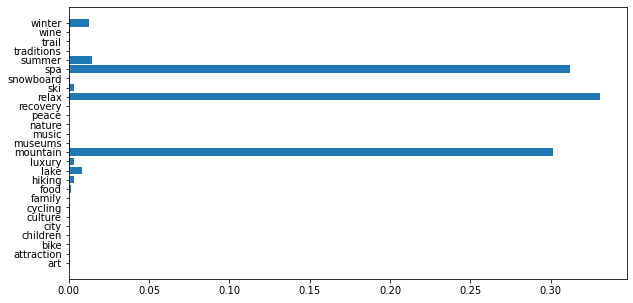

In [24]:
user.plot_weights()

## Clustering

In [7]:
clustering = Clustering(data, model, cluster_by_words=False, n_clusters=5)

In [8]:
clustering.fit()
topics = clustering.generate_topics()
print(topics)

['German', 'mountains', 'museum', 'ice', 'just']


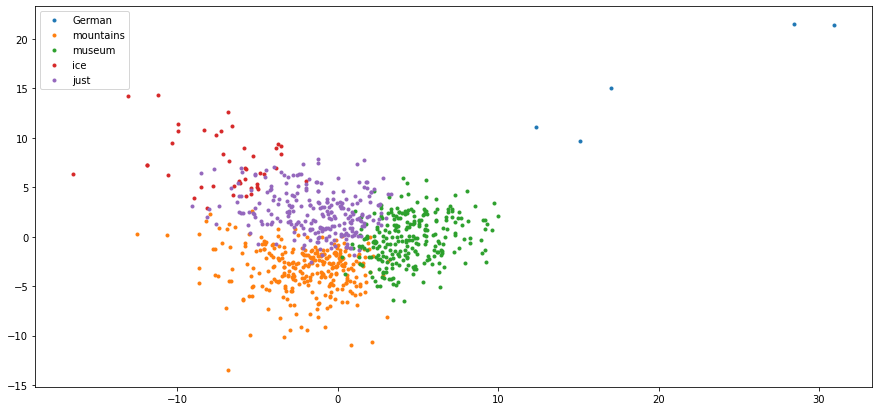

In [9]:
clustering.plot_clusters()

## Geographical data

In [18]:
vec_by_topics = np.load('data/vec_articles.npy')
articles = ArticlesGeo(data, topics, vec_by_topics)

In [20]:
choices = ['ski', 'spa']

user = User(topics, choices)

In [36]:
comb_ids, comb_vec, dist, coordinates = articles.get_geo_recommendations(user, max_dist=25, max_n_activities=2, n_recommendations=5, n_best_articles=100)

Show all the articles in the combinations

In [37]:
for i, comb in enumerate(comb_ids):
    print(i)
    for article in comb:
        print(article, articles.get_summary(article))
        print()

0
397 Snowboarders and freestyle skiers will find perfect conditions in the Gran Masta Park next to the Brenggen ski lift on the Hahnenmoos.

134 The Romans were among the first to recognise the healing properties of the hot springs of Leukerbad. This thermal spa resort lies well protected in a Valais side valley and is now a popular destination for wellness and sports’ enthusiasts.

1
310 Located in alpine parklands, Campra is the best cross-country skiing area in Ticino and easily reached from Milan.

544 Architects and architecture enthusiasts from all over the world travel to this small village in the small Graubuenden valley. For an extraordinary architect has built a spa resort there, of pure stone, greenish in color, weighing tons. And by the way, the «7132 Therme» in Vals also happens to be a wellness temple.

2
482 The spa in Bad Ragaz has been well known since the early Middle Ages and is still considered the most plenteous aquatic spa in Europe. Switch off and recharge your 

Visualize combinations in the map

In [38]:
CH_COOR = [46.8, 8.8]  # coordinates of the center of Switzerland
COLORS = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
          'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
          'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

In [39]:
mapp = folium.Map(location=CH_COOR, zoom_start=7,
                     tiles='cartodbpositron', width=800, height=400)
_ = [[folium.CircleMarker(location=c, radius=1,
                     color=COLORS[i%len(COLORS)]).add_to(mapp)
 for c in coor] for i, coor in enumerate(coordinates)]
mapp